In [3]:
from PyHa.statistics import *
# from PyHa.IsoAutio import *
# from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fg_bg_pre = pd.read_csv("segmentation_csvs/fg_bg_pre.csv")
manual = pd.read_csv("segmentation_csvs/manual_pre.csv")
microfaune = pd.read_csv("segmentation_csvs/microfaune_pre.csv")
tweetynet = pd.read_csv("segmentation_csvs/tweetynet_pre.csv")

In [5]:
stats_table = pd.concat([annotation_duration_statistics(manual).assign(TECHNIQUE = ['Manual']),
           annotation_duration_statistics(fg_bg_pre).assign(TECHNIQUE = ['FG BG Sep']),
           annotation_duration_statistics(microfaune).assign(TECHNIQUE = ['Microfaune']),
           annotation_duration_statistics(tweetynet).assign(TECHNIQUE = ['Tweetynet'])]).set_index('TECHNIQUE')

c:\Users\seanh\Desktop\e4e\sustech-2024-xc-segmentation\annotation_duration_display\PyHa\statistics.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],
c:\Users\seanh\Desktop\e4e\sustech-2024-xc-segmentation\annotation_duration_display\PyHa\statistics.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

In [6]:
stats_table.to_csv('segmentation_techniques_stats.csv')

In [7]:
stats_table

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
TECHNIQUE,,,,,,,,,
Manual,24505,0.30,1.070786,1.854409,0.000000,0.360100,0.610000,1.170000,143.316900
FG BG Sep,160106,0.03,0.130627,0.237468,0.023039,0.031678,0.057596,0.138231,17.074444
Microfaune,7419,1.52,3.848667,4.437374,0.842789,1.592789,2.358299,4.283673,135.102653
Tweetynet,31345,0.05,1.378788,5.704164,0.023256,0.186047,0.465116,1.000000,178.000000


In [8]:
manual

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
0,Actitis-macularius-257516.wav,21.7600,6.5711,1.0000,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
1,Actitis-macularius-257516.wav,21.7600,1.7911,0.5400,24000,0,44100,Actitis-macularius,4935.930,alarce,11/22/2021,03:18:44,./Mixed_Bird/
2,Actitis-macularius-257516.wav,21.7600,14.6511,0.6200,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
3,Actitis-macularius-257516.wav,21.7600,9.1711,0.8900,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
4,Actitis-macularius-257516.wav,21.7600,5.0511,0.6500,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia-capensis,623.174,JacobGlennAyers,10/10/2021,02:06:40,./Mixed_Bird/
24501,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia-capensis,623.135,JacobGlennAyers,10/10/2021,02:06:40,./Mixed_Bird/
24502,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia-capensis,229.527,JacobGlennAyers,10/18/2021,17:33:36,./Mixed_Bird/
24503,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia-capensis,229.543,JacobGlennAyers,10/18/2021,17:33:36,./Mixed_Bird/


In [9]:
cutoff = 15
durations_df = pd.DataFrame(
    {
        'manual': manual['DURATION'][manual['DURATION'] < cutoff],
        'fg bg pre': fg_bg_pre['DURATION'][fg_bg_pre['DURATION'] < cutoff],
        'microfaune': microfaune['DURATION'][microfaune['DURATION'] < cutoff],
        'tweetynet': tweetynet['DURATION'][tweetynet['DURATION'] < cutoff]
    }
)
durations_df

,manual,fg bg pre,microfaune,tweetynet
0,1.00,0.302381,1.685578,1.744186
1,0.54,1.344875,2.636667,0.906977
2,0.62,0.028798,2.799048,1.581395
3,0.89,0.028798,1.755170,0.348837
4,0.65,0.028798,1.500000,0.395349
...,...,...,...,...
160101,NaN,0.195828,NaN,NaN
160102,NaN,0.192948,NaN,NaN
160103,NaN,0.184308,NaN,NaN
160104,NaN,0.048957,NaN,NaN


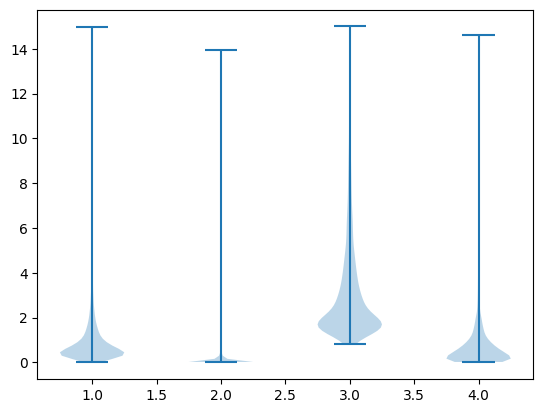

In [10]:
all_durations = [
        manual['DURATION'][manual['DURATION'] < cutoff],
        fg_bg_pre['DURATION'][fg_bg_pre['DURATION'] < cutoff],
        microfaune['DURATION'][microfaune['DURATION'] < cutoff],
        tweetynet['DURATION'][tweetynet['DURATION'] < cutoff]
]
plt.violinplot(all_durations);

In [11]:
durations_df.head()

,manual,fg bg pre,microfaune,tweetynet
0,1.00,0.302381,1.685578,1.744186
1,0.54,1.344875,2.636667,0.906977
2,0.62,0.028798,2.799048,1.581395
3,0.89,0.028798,1.755170,0.348837
4,0.65,0.028798,1.500000,0.395349


In [12]:
fg_bg_pre = pd.read_csv("segmentation_csvs/fg_bg_pre.csv")
fg_bg_pre["TYPE"]  = "fg_bg_pre"
manual = pd.read_csv("segmentation_csvs/manual_pre.csv")
manual["TYPE"]  = "manual"
microfaune = pd.read_csv("segmentation_csvs/microfaune_pre.csv")
microfaune["TYPE"]  = "microfaune"
tweetynet = pd.read_csv("segmentation_csvs/tweetynet_pre.csv")
tweetynet["TYPE"]  = "tweetynet"

df = pd.concat([microfaune, fg_bg_pre, tweetynet, manual])
df.head()

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,MANUAL ID,DURATION,TYPE,MAX FREQ,MIN FREQ,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
0,./Mixed_Bird/,Tachornis-squamata-401367.wav,0.0,30.249796,44100.0,18.851701,Tachornis-squamata,1.685578,microfaune,NaN,NaN,NaN,NaN,NaN,NaN
1,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,1.662517,Buteo-albonotatus,2.636667,microfaune,NaN,NaN,NaN,NaN,NaN,NaN
2,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,12.797211,Buteo-albonotatus,2.799048,microfaune,NaN,NaN,NaN,NaN,NaN,NaN
3,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,21.403401,Buteo-albonotatus,1.755170,microfaune,NaN,NaN,NaN,NaN,NaN,NaN
4,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,31.517415,Buteo-albonotatus,1.500000,microfaune,NaN,NaN,NaN,NaN,NaN,NaN


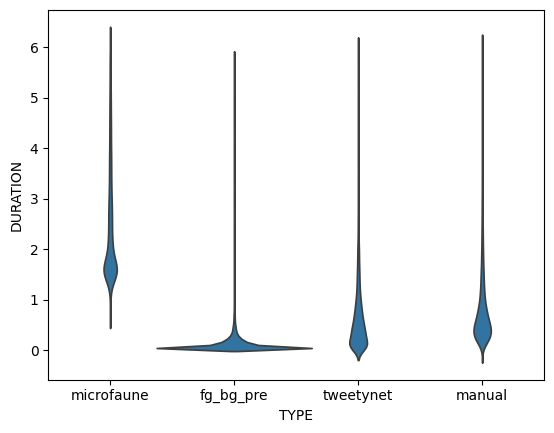

In [13]:
import seaborn as sns
sns.violinplot(data=df[df["DURATION"] < 6], x="TYPE", y="DURATION", inner=None, width=1.25);

[Text(0, -3, '0.001'),
 Text(0, -2, '0.01'),
 Text(0, -1, '0.1'),
 Text(0, 0, '1.0'),
 Text(0, 1, '10.0'),
 Text(0, 2, '100.0'),
 Text(0, 3, '1000.0')]

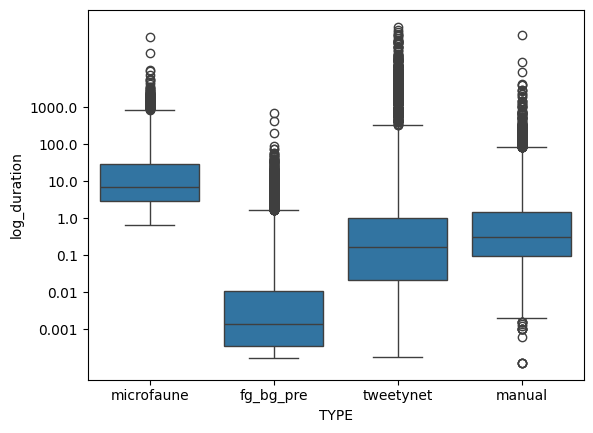

In [14]:
import numpy as np
df["log_duration"] = df["DURATION"].apply(np.log).to_list()
df = df.reset_index()
ax = sns.boxplot(data=df, x="TYPE", y="log_duration")
ax.set_yticks(np.arange(-3, 4))
ax.set_yticklabels(10.0**np.arange(-3, 4))

In [15]:
!pip install SciencePlots

In [16]:
import matplotlib.pyplot as plt
# import scienceplots

# plt.style.use(['science','ieee','no-latex', ])


Text(0.5, 1.0, 'Log Distrbution of Annotation Durations')

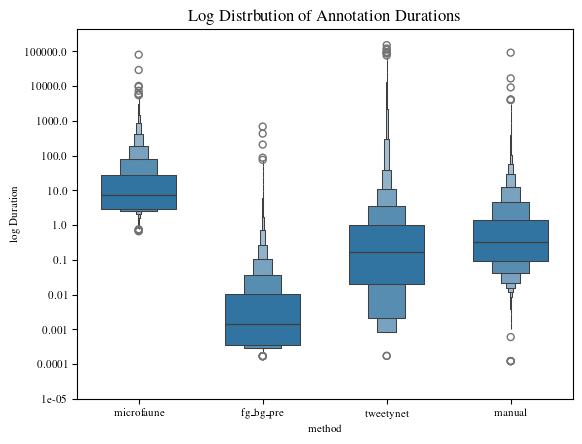

In [19]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
import seaborn as sns

ax = sns.boxenplot(data=df, x="TYPE", y="log_duration", width=0.6);
ax.set_yticks(np.arange(-5, 6))
ax.set_yticklabels(10.0**np.arange(-5, 6))
ax.set_ylabel("log Duration")
ax.set_xlabel("method")
ax.set_title("Log Distrbution of Annotation Durations")


Text(0.5, 1.0, 'Log Distrbution of Annotation Durations')

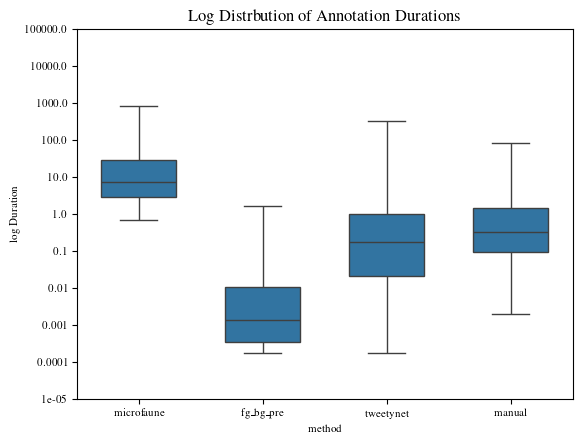

In [32]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
import seaborn as sns

ax = sns.boxplot(data=df, x="TYPE", y="log_duration", width=0.6, showfliers=False);
ax.set_yticks(np.arange(-5, 6))
ax.set_yticklabels(10.0**np.arange(-5, 6))
ax.set_ylabel("log Duration")
ax.set_xlabel("method")
ax.set_title("Log Distrbution of Annotation Durations")


Text(0.5, 1.0, 'Log Distrbution of Annotation Durations')

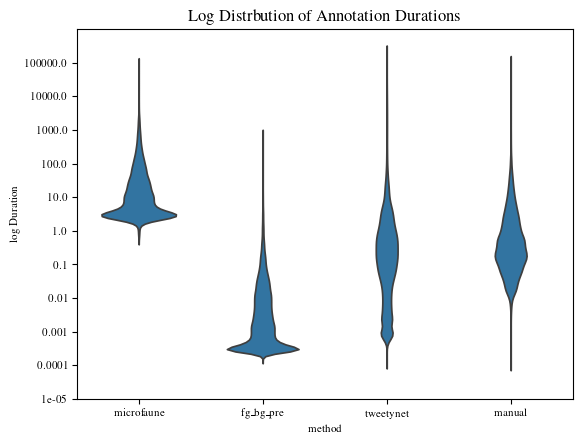

In [35]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
import seaborn as sns

ax = sns.violinplot(data=df, x="TYPE", y="log_duration", inner=None, width=0.6, );
ax.set_yticks(np.arange(-5, 6))
ax.set_yticklabels(10.0**np.arange(-5, 6))
ax.set_ylabel("log Duration")
ax.set_xlabel("method")
ax.set_title("Log Distrbution of Annotation Durations")


In [21]:
df

,index,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,MANUAL ID,DURATION,TYPE,MAX FREQ,MIN FREQ,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,log_duration
0,0,./Mixed_Bird/,Tachornis-squamata-401367.wav,0.0,30.249796,44100.0,18.851701,Tachornis-squamata,1.685578,microfaune,NaN,NaN,NaN,NaN,NaN,NaN,0.522109
1,1,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,1.662517,Buteo-albonotatus,2.636667,microfaune,NaN,NaN,NaN,NaN,NaN,NaN,0.969515
2,2,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,12.797211,Buteo-albonotatus,2.799048,microfaune,NaN,NaN,NaN,NaN,NaN,NaN,1.029279
3,3,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,21.403401,Buteo-albonotatus,1.755170,microfaune,NaN,NaN,NaN,NaN,NaN,NaN,0.562566
4,4,./Mixed_Bird/,Buteo-albonotatus-521956.wav,0.0,41.978776,44100.0,31.517415,Buteo-albonotatus,1.500000,microfaune,NaN,NaN,NaN,NaN,NaN,NaN,0.405465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223370,24500,./Mixed_Bird/,Zonotrichia-capensis-232609.wav,NaN,98.856000,32000.0,63.277200,Zonotrichia-capensis,1.830100,manual,24000.0,0.0,623.174,JacobGlennAyers,10/10/2021,02:06:40,0.604371
223371,24501,./Mixed_Bird/,Zonotrichia-capensis-232609.wav,NaN,98.856000,32000.0,34.155400,Zonotrichia-capensis,2.470200,manual,24000.0,0.0,623.135,JacobGlennAyers,10/10/2021,02:06:40,0.904299
223372,24502,./Mixed_Bird/,Zonotrichia-capensis-377483.wav,NaN,18.259600,44100.0,0.576200,Zonotrichia-capensis,3.219900,manual,24000.0,0.0,229.527,JacobGlennAyers,10/18/2021,17:33:36,1.169350
223373,24503,./Mixed_Bird/,Zonotrichia-capensis-377483.wav,NaN,18.259600,44100.0,6.816000,Zonotrichia-capensis,2.150000,manual,24000.0,0.0,229.543,JacobGlennAyers,10/18/2021,17:33:36,0.765468


In [24]:
df.TYPE.unique()

array(['microfaune', 'fg_bg_pre', 'tweetynet', 'manual'], dtype=object)

In [28]:

stats.kstest(df[df.TYPE == "manual"]["DURATION"].to_numpy(), df[df.TYPE == "fg_bg_pre"]["DURATION"].to_numpy())

KstestResult(statistic=0.7767290094103719, pvalue=0.0, statistic_location=0.1987074829931998, statistic_sign=-1)

In [29]:

stats.kstest(df[df.TYPE == "manual"]["DURATION"].to_numpy(), df[df.TYPE == "microfaune"]["DURATION"].to_numpy())

KstestResult(statistic=0.7950388936967594, pvalue=0.0, statistic_location=1.4901, statistic_sign=1)

In [30]:

stats.kstest(df[df.TYPE == "manual"]["DURATION"].to_numpy(), df[df.TYPE == "tweetynet"]["DURATION"].to_numpy())

KstestResult(statistic=0.20782822911676396, pvalue=0.0, statistic_location=0.1627906976744384, statistic_sign=-1)